In [ ]:
https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

download images from https://github.com/opencv/opencv/tree/master/samples/data

In [6]:
import numpy as np
import cv2 as cv
import glob

%matplotlib inline
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
print (objp.shape)
print (objp[0])
print (objp[1])
print (objp[22])
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
print (objp.shape)
print (objp[0])
print (objp[1])
print (objp[22])


(42, 3)
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
(42, 3)
[0. 0. 0.]
[1. 0. 0.]
[1. 3. 0.]


fname chess04.jpeg
ret True


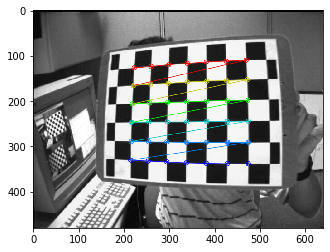

fname chess05.jpeg
ret True


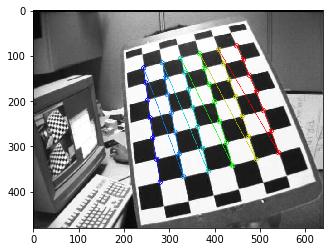

fname chess02.jpeg
ret True


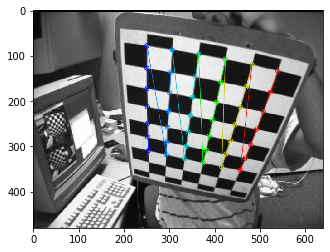

fname chess03.jpeg
ret True


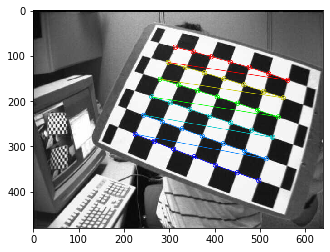

fname chess01.jpeg
ret True


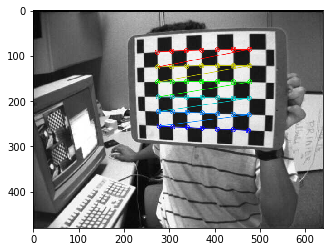

fname chess06.jpeg
ret True


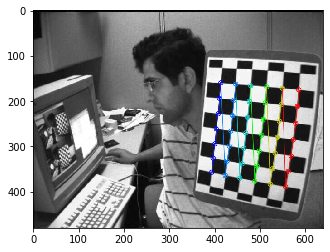

In [9]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('chess*.jpeg')
for fname in images:
    print ('fname',fname)
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    print ('ret',ret)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        #cv.imshow('img', img)
        plt.imshow(img)
        plt.show()
        #cv.waitKey(500)
#cv.destroyAllWindows()

In [10]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [17]:
img = cv.imread('chess04.jpeg')



In [ ]:
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [13]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

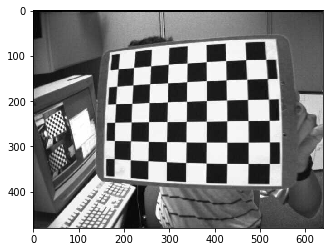

In [18]:
plt.imshow(img)

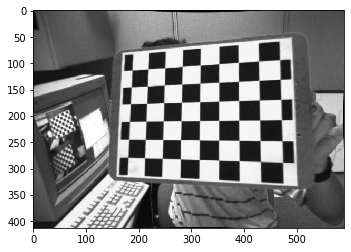

In [14]:
 plt.imshow(dst)

In [ ]:
Another image

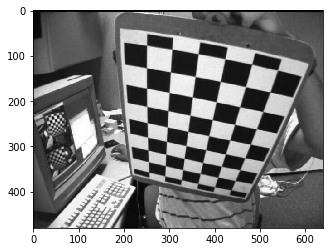

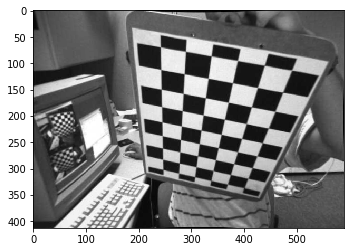

In [20]:
img = cv.imread('chess02.jpeg')
plt.imshow(img)
plt.show()
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult02.png', dst)
plt.imshow(dst)